In [10]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [12]:
start = '2021-08-20'
end = '2022-08-20'
market = 'SPY'
symbol1 = 'AAPL'
symbol2 = 'MSFT'
bench = yf.download(market, start=start, end=end)['Adj Close']
stock1 = yf.download(symbol1, start=start, end=end)['Adj Close']
stock2 = yf.download(symbol2, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Stock prices from 2021-08-20 to 2022-08-20')

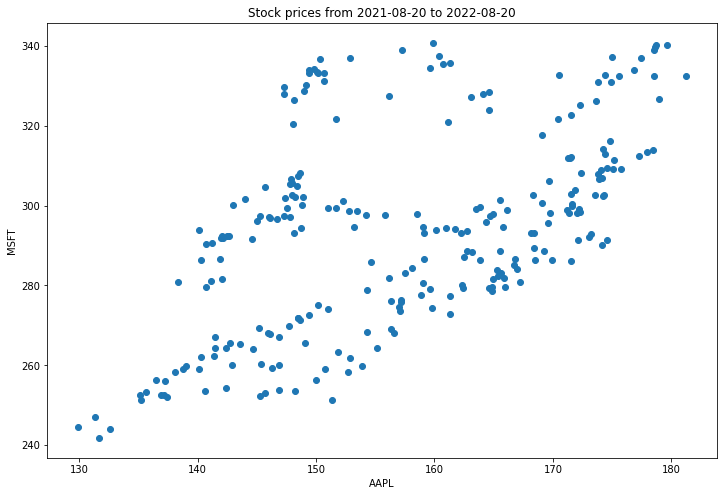

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(stock1,stock2)
plt.xlabel(symbol1)
plt.ylabel(symbol2)
plt.title('Stock prices from ' + start + ' to ' + end)


Text(0.5, 1.0, 'Stock prices from 2021-08-20 to 2022-08-20')

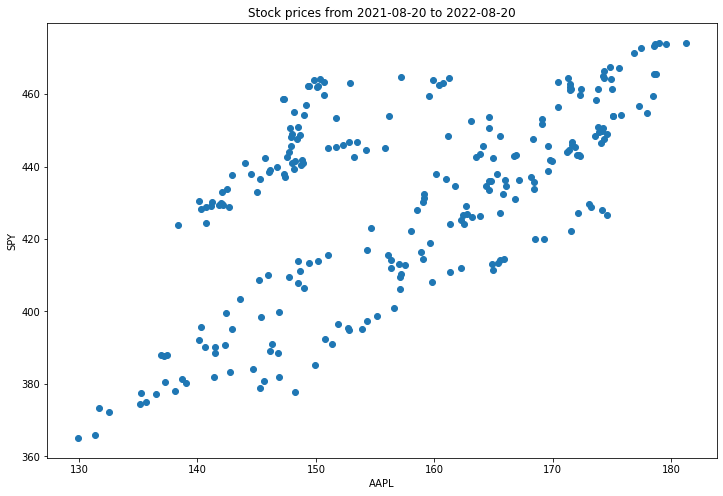

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(stock1,bench)
plt.xlabel(symbol1)
plt.ylabel(market)
plt.title('Stock prices from ' + start + ' to ' + end)

Text(0.5, 1.0, 'Stock prices from 2021-08-20 to 2022-08-20')

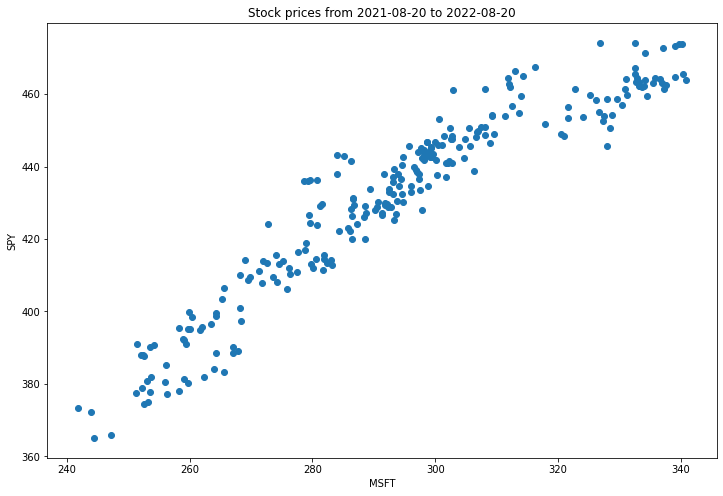

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(stock2,bench)
plt.xlabel(symbol2)
plt.ylabel(market)
plt.title('Stock prices from ' + start + ' to ' + end)

In [16]:
print("Correlation coefficients")
print(symbol1 + ' and ' + symbol2 + ':', np.corrcoef(stock1,stock2)[0,1])
print(symbol1 + ' and ' + market + ':', np.corrcoef(stock1,bench)[0,1])
print(market + ' and ' + symbol2 + ':', np.corrcoef(bench,stock2)[0,1])

Correlation coefficients
AAPL and MSFT: 0.5446907632267018
AAPL and SPY: 0.6203419257654504
SPY and MSFT: 0.9449747675374535


Text(0, 0.5, '60-day Rolling Correlation')

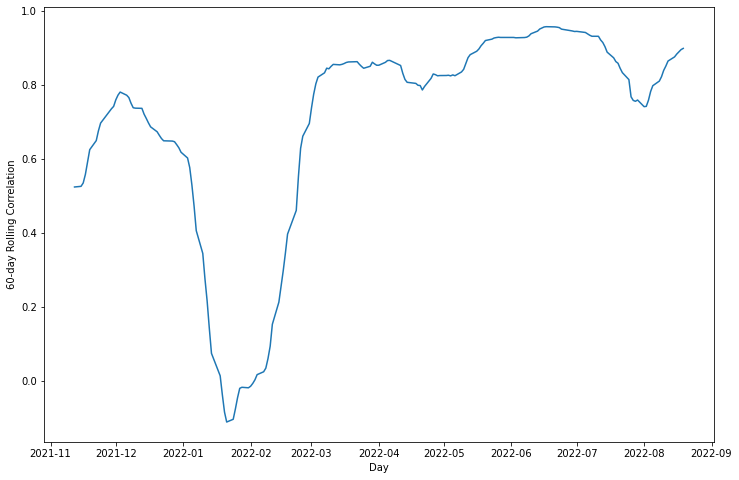

In [17]:
rolling_correlation = stock1.rolling(60).corr(stock2)
plt.figure(figsize=(12,8))
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')